# **1.Getting the Data**

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['INFY', 'TCS']

# Set up End and Start times for data grab
tech_list = ['INFY', 'TCS']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list =[INFY, TCS]
company_name = ['INFY', 'TCS']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-02-22,1.24,1.24,1.17,1.220,1.220,186500,TCS
2024-02-23,1.20,1.32,1.20,1.280,1.280,205400,TCS
2024-02-26,1.27,1.38,1.25,1.350,1.350,139000,TCS
2024-02-27,1.36,1.42,1.27,1.290,1.290,212800,TCS
2024-02-28,1.25,1.39,1.25,1.370,1.370,124300,TCS
2024-02-29,1.37,1.41,1.32,1.380,1.380,216400,TCS
2024-03-01,1.36,1.41,1.33,1.370,1.370,135500,TCS
2024-03-04,1.35,1.38,1.29,1.330,1.330,196800,TCS
2024-03-05,1.30,1.31,1.19,1.220,1.220,211800,TCS


### **`Descriptive Statistics about the Data`**

In [3]:
# Summary Stats
TCS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,2.460158,2.532925,2.383794,2.452036,2.452036,4.493694e+05
std,0.711222,0.715151,0.695022,0.703903,0.703903,5.033099e+05
min,1.070000,1.240000,0.950000,1.030000,1.030000,3.155000e+04
25%,1.920000,1.990000,1.860000,1.910000,1.910000,2.164000e+05
50%,2.330000,2.400000,2.250000,2.330000,2.330000,3.290000e+05
75%,3.110000,3.160000,3.050000,3.110000,3.110000,5.095000e+05
max,4.490000,4.490000,4.180000,4.230000,4.230000,4.925700e+06


In [4]:
# General info
TCS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-03-06 to 2024-03-06
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


# **Closing Price**

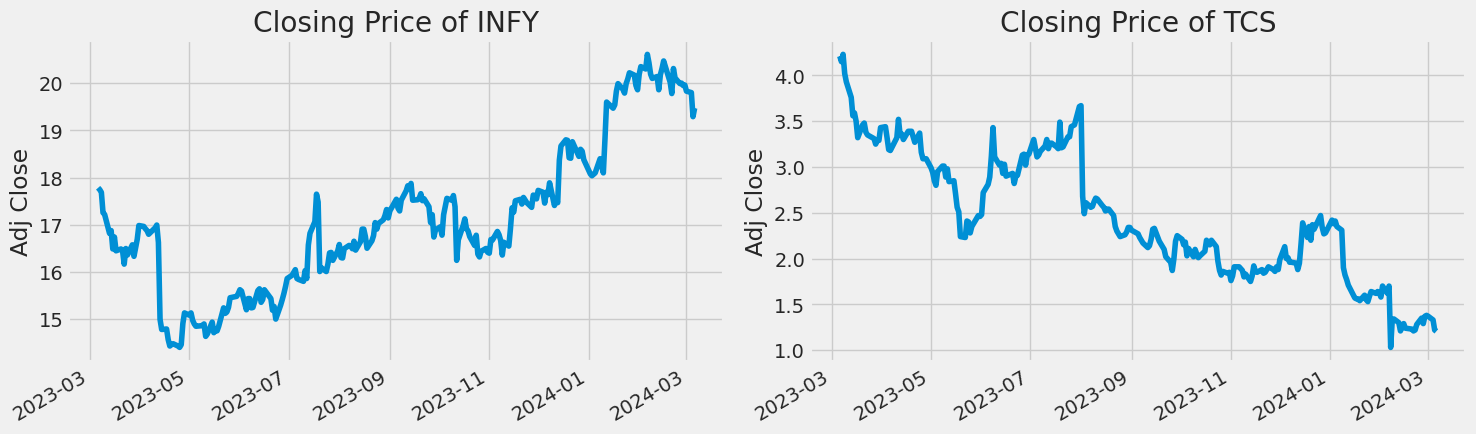

In [5]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

# **Volume of Sales**

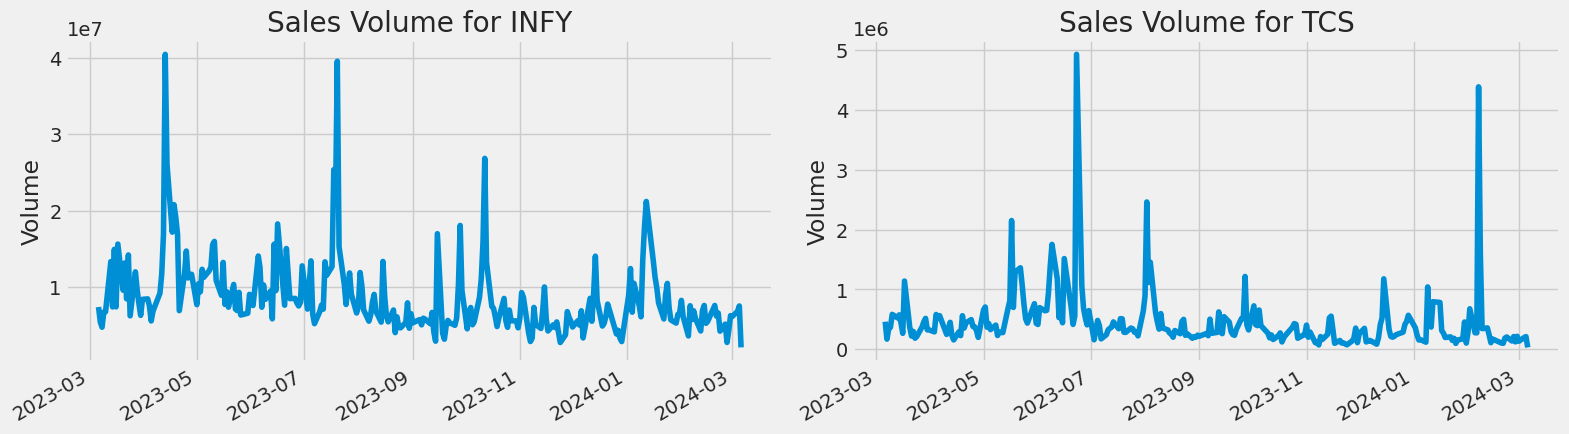

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(16, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

# **2. What was the moving average of the various stocks?**

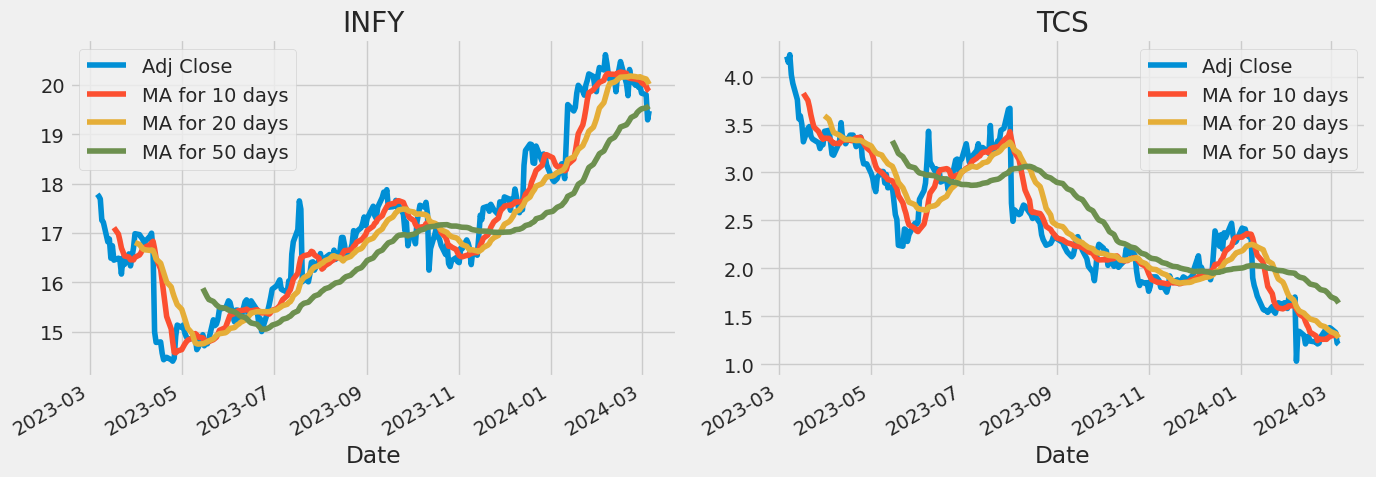

In [7]:

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(14)

company_list[0][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0])
axes[0].set_title(f'{company_name[0]}')

company_list[1][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1])
axes[1].set_title(f'{company_name[1]}')
# If you have more companies, you can add additional plots in a similar way
fig.tight_layout()
plt.show()

# **3. What was the daily return of the stock on average?**

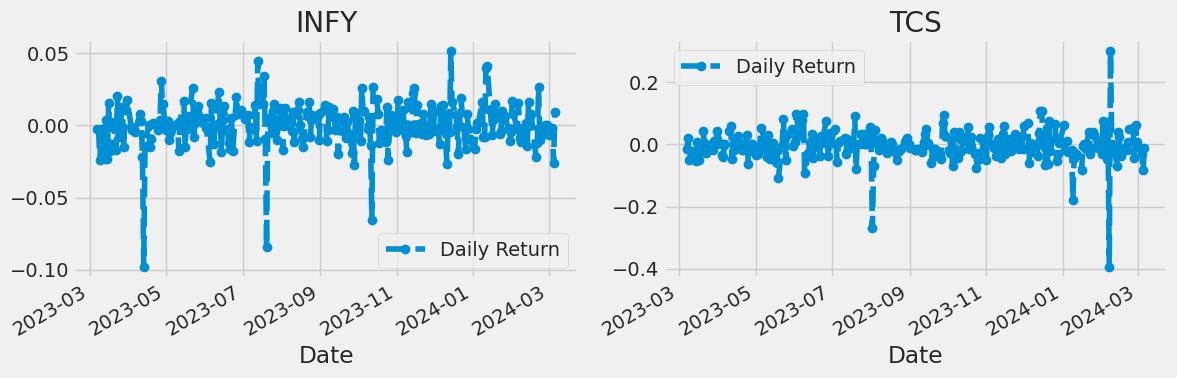

In [8]:

for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(4)
fig.set_figwidth(12)

company_list[0]['Daily Return'].plot(ax=axes[0], legend=True, linestyle='--', marker='o')
axes[0].set_title(f'{company_name[0]}')

company_list[1]['Daily Return'].plot(ax=axes[1], legend=True, linestyle='--', marker='o')
axes[1].set_title(f'{company_name[1]}')

fig.tight_layout()
plt.show()


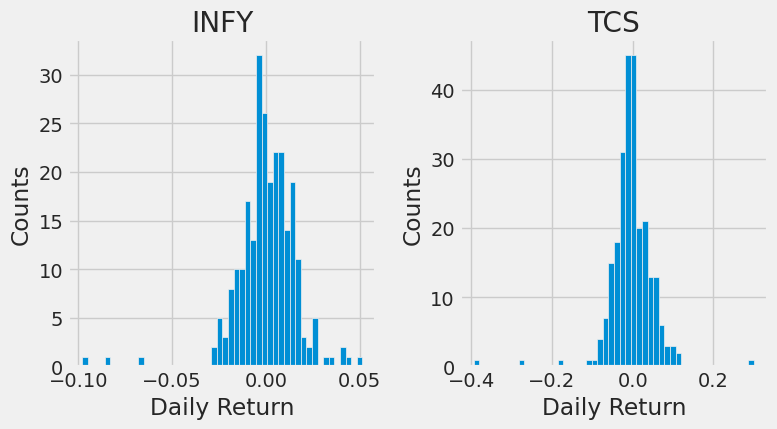

In [9]:
plt.figure(figsize=(8, 8))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

#**4. What was the correlation between different stocks closing prices?**

In [10]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  2 of 2 completed


Ticker,INFY,TCS
Date,,
2023-03-06,NaN,NaN
2023-03-07,-0.002191,-0.014252
2023-03-08,-0.003293,0.019277
2023-03-09,-0.024229,-0.049645
2023-03-10,-0.002257,-0.022388


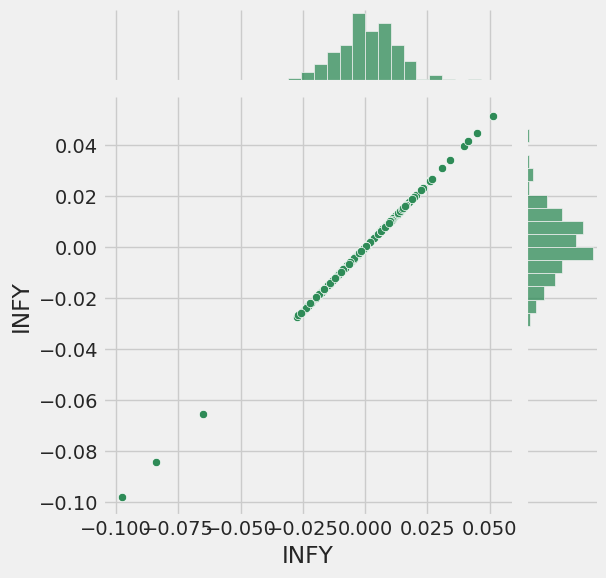

In [11]:
# Comparing INFY to itself should show a perfectly linear relationship
sns.jointplot(x=f'{company_name[0]}', y=f'{company_name[0]}', data=tech_rets, kind='scatter', color='seagreen')

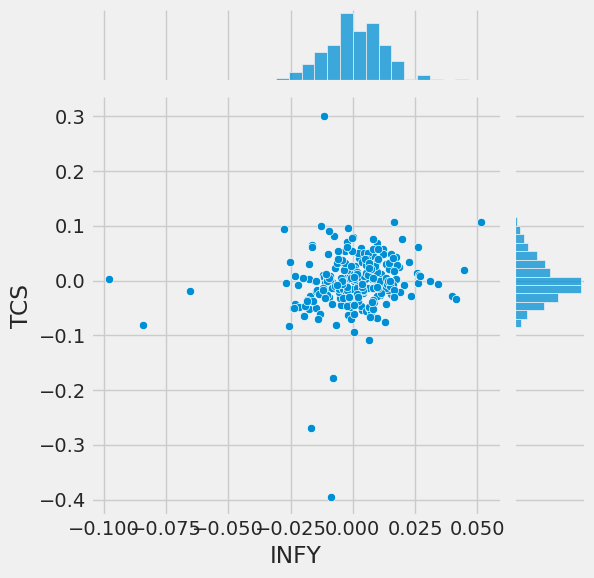

In [12]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x=f'{company_name[0]}', y=f'{company_name[1]}', data=tech_rets, kind='scatter')

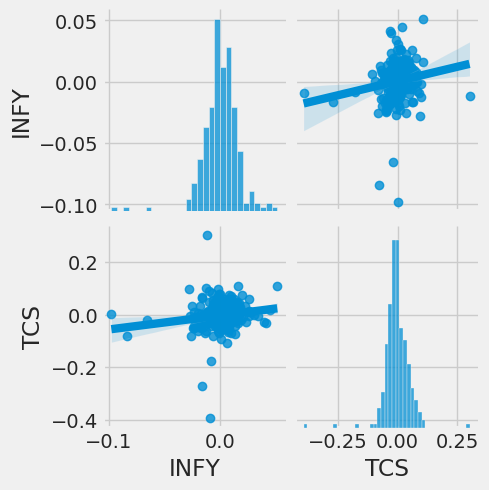

In [13]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

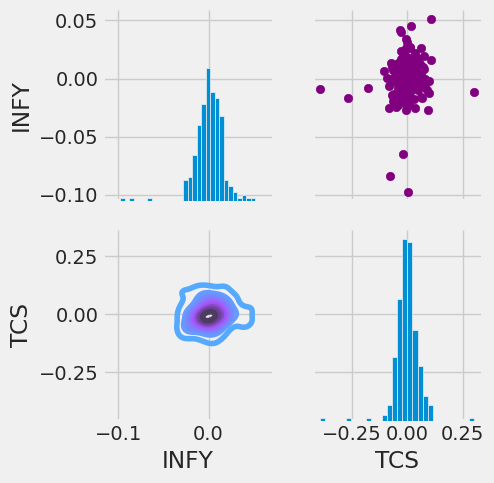

In [14]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

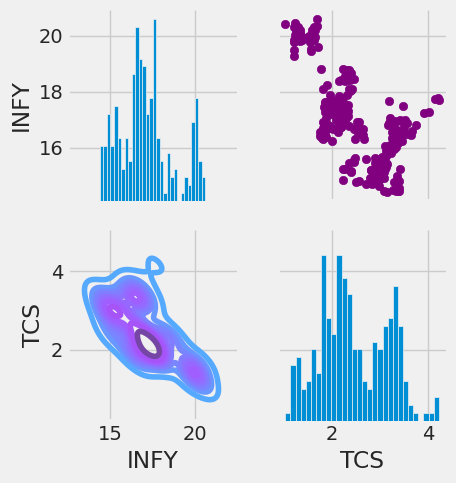

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

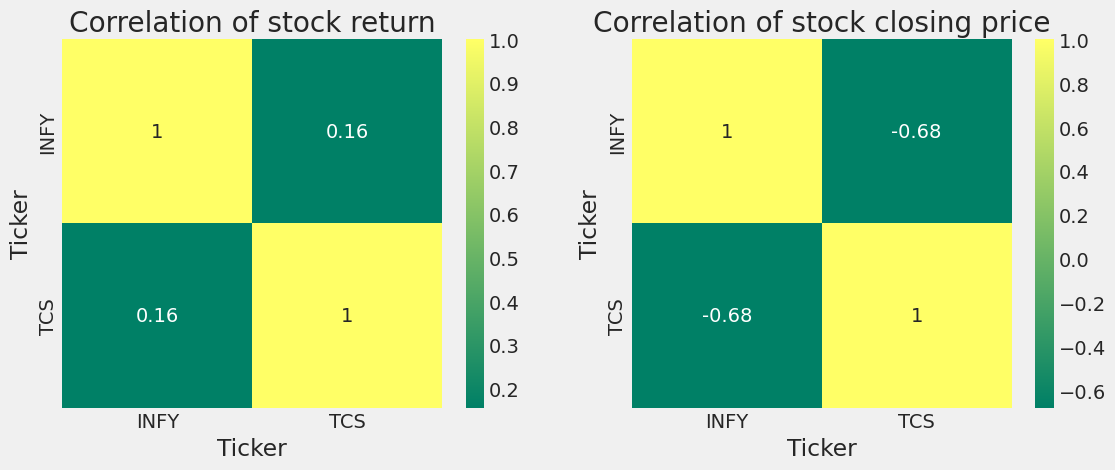

In [16]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

#**5. How much value do we put at risk by investing in a particular stock?**

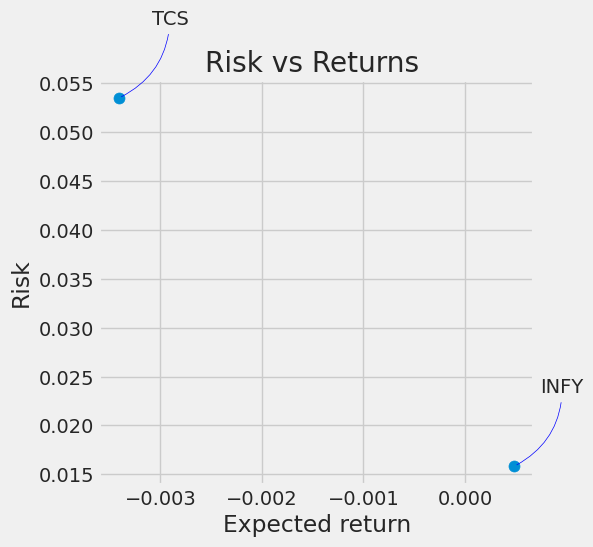

In [29]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(5, 5))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('Risk vs Returns ')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# **6. Predicting the closing price stock price of INFY inc:**

In [18]:
# Get the stock quote
df = pdr.get_data_yahoo(f'{company_name[0]}', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,6.706250,6.805000,6.662500,6.681250,4.987726,14123200
2012-01-04,6.700000,6.757500,6.638750,6.650000,4.964396,9913600
2012-01-05,6.651250,6.793750,6.640000,6.751250,5.039982,12347200
2012-01-06,6.726250,6.750000,6.640000,6.740000,5.031583,10824000
2012-01-09,6.771250,6.932500,6.752500,6.917500,5.164093,16880000
...,...,...,...,...,...,...
2024-02-29,20.030001,20.090000,19.930000,19.959999,19.959999,6256900
2024-03-01,19.920000,19.920000,19.760000,19.830000,19.830000,6151800
2024-03-04,19.639999,19.809999,19.500000,19.799999,19.799999,6821800


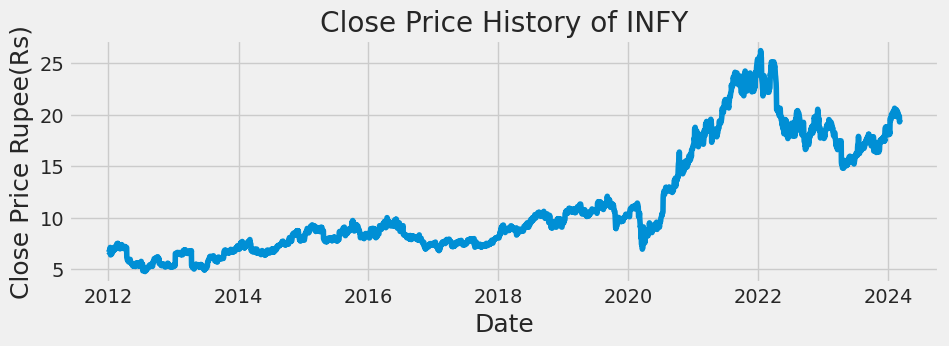

In [19]:
plt.figure(figsize=(10,3))
plt.title(f'Close Price History of {company_name[0]}')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupee(Rs)', fontsize=18)
plt.show()

In [20]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2910

In [21]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0891326 ],
       [0.08767428],
       [0.09239923],
       ...,
       [0.70133576],
       [0.67753604],
       [0.68616928]])

In [22]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.0891326 , 0.08767428, 0.09239923, 0.09187423, 0.10015751,
       0.1035408 , 0.10908242, 0.07979933, 0.07530772, 0.08020766,
       0.07950767, 0.07892435, 0.08236599, 0.0853993 , 0.08994926,
       0.09362423, 0.09718254, 0.09414923, 0.09403256, 0.09811586,
       0.10091584, 0.10109083, 0.11036575, 0.10593247, 0.1040658 ,
       0.10243248, 0.10575745, 0.10231581, 0.10418246, 0.11118241,
       0.12028234, 0.12389897, 0.12500729, 0.1246573 , 0.12792393,
       0.12529897, 0.1251823 , 0.11987401, 0.11864901, 0.11380739,
       0.11497405, 0.11386572, 0.11030743, 0.10260747, 0.11019076,
       0.11404073, 0.1168407 , 0.1132824 , 0.12121567, 0.11981567,
       0.12185733, 0.12016567, 0.11625736, 0.1136324 , 0.1141574 ,
       0.10674912, 0.11001575, 0.1122324 , 0.11316573, 0.10348248])]
[0.1066907779792444]

[array([0.0891326 , 0.08767428, 0.09239923, 0.09187423, 0.10015751,
       0.1035408 , 0.10908242, 0.07979933, 0.07530772, 0.08020766,
       0.07950767, 0.07892435, 0.082

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=4)

Epoch 1/4
2850/2850 [==============================] - 24s 7ms/step - loss: 0.0012
Epoch 2/4
2850/2850 [==============================] - 21s 8ms/step - loss: 5.7941e-04
Epoch 3/4
2850/2850 [==============================] - 20s 7ms/step - loss: 3.8975e-04
Epoch 4/4
2850/2850 [==============================] - 21s 7ms/step - loss: 3.3895e-04


In [31]:
# x_test

In [32]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 4ms/step


0.656985189557991

In [33]:
x_test

array([[[0.50253746],
        [0.49507087],
        [0.49133757],
        ...,
        [0.5417371 ],
        [0.55293708],
        [0.55340367]],

       [[0.49507087],
        [0.49133757],
        [0.48900425],
        ...,
        [0.55293708],
        [0.55340367],
        [0.5454704 ]],

       [[0.49133757],
        [0.48900425],
        [0.48947092],
        ...,
        [0.55340367],
        [0.5454704 ],
        [0.55480369]],

       ...,

       [[0.59213667],
        [0.60286998],
        [0.60053662],
        ...,
        [0.70833578],
        [0.70880236],
        [0.70273579]],

       [[0.60286998],
        [0.60053662],
        [0.61220319],
        ...,
        [0.70880236],
        [0.70273579],
        [0.70133576]],

       [[0.60053662],
        [0.61220319],
        [0.58980339],
        ...,
        [0.70273579],
        [0.70133576],
        [0.67753604]]])

<ipython-input-37-2633e918c23d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


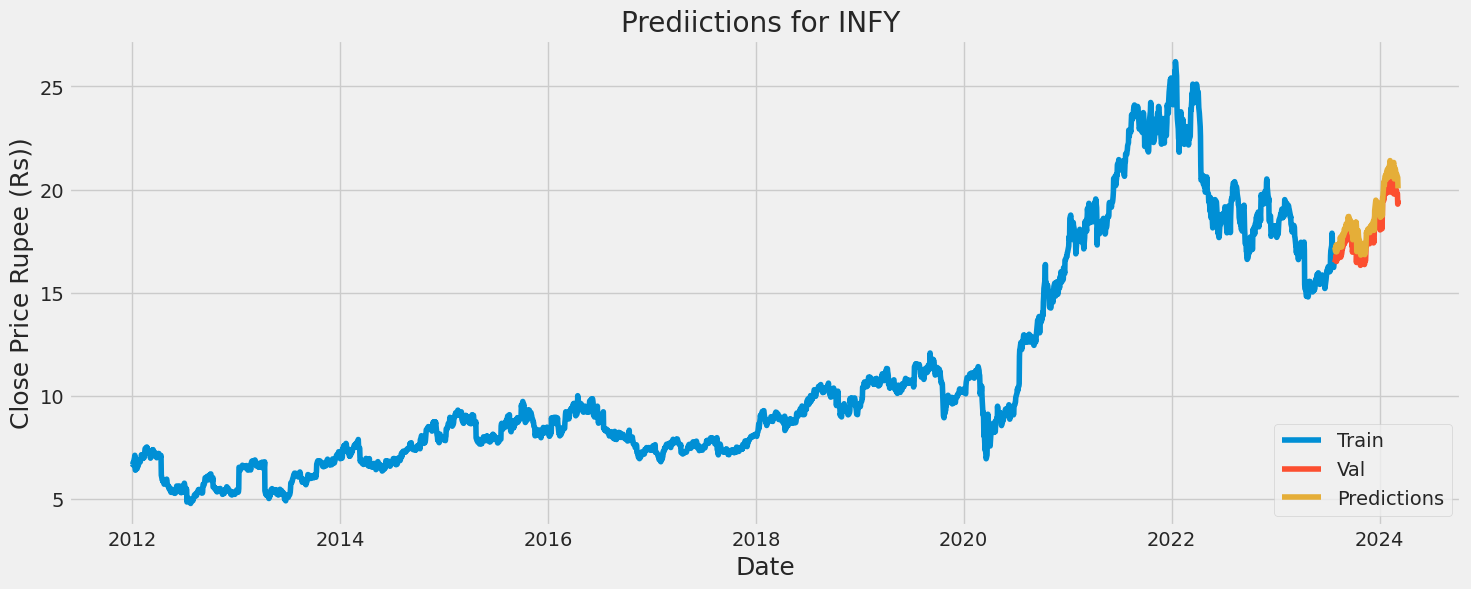

In [37]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title(f'Prediictions for {company_name[0]} ')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupee (Rs))', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [35]:
valid

,Close,Predictions
Date,,
2023-07-28,16.459999,17.202875
2023-07-31,16.660000,16.985584
2023-08-01,16.799999,17.140053
2023-08-02,16.520000,17.317278
2023-08-03,16.510000,17.047365
...,...,...
2024-02-29,19.959999,20.737434
2024-03-01,19.830000,20.750187
2024-03-04,19.799999,20.621250


In [36]:
# Show the valid and predicted prices
valid[0:50]



,Close,Predictions
Date,,
2023-07-28,16.459999,17.202875
2023-07-31,16.660000,16.985584
2023-08-01,16.799999,17.140053
2023-08-02,16.520000,17.317278
2023-08-03,16.510000,17.047365
2023-08-04,16.709999,16.982965
2023-08-07,16.780001,17.198383
2023-08-08,16.770000,17.311426
2023-08-09,16.709999,17.298595
